In [10]:
function ilorazyRoznicowe(x::Vector{Float64}, f::Vector{Float64})
    n = length(x)

    ret = [f[1]]

    for i in 1:n-1
        for j in 1:n-i
            f[j] = (f[j + 1] - f[j]) / (x[i + j] - x[j])
        end
        push!(ret, f[1])
    end

    return ret
end

function warNewton(x::Vector{Float64}, fx::Vector{Float64}, t::Float64)
    nt = 0

    for i in reverse(1:length(x))
        nt = fx[i] + nt * (t - x[i])
    end

    return nt
end

function naturalna(x::Vector{Float64}, fx::Vector{Float64})
    n = length(x)
    a = zeros(n)

    for i in reverse(1:n)
        for j in i:n-1
            a[j] -= a[j+1] * x[i]
        end
        a[i] += fx[i]
    end

    return a
end

naturalna (generic function with 1 method)

In [11]:
x = [1.,2.,3.]
f = [1., 4., 9.]
fx = ilorazyRoznicowe(x, f)
println(fx)

println(naturalna(x, fx))

[1.0, 3.0, 1.0]
[0.0, 0.0, 1.0]


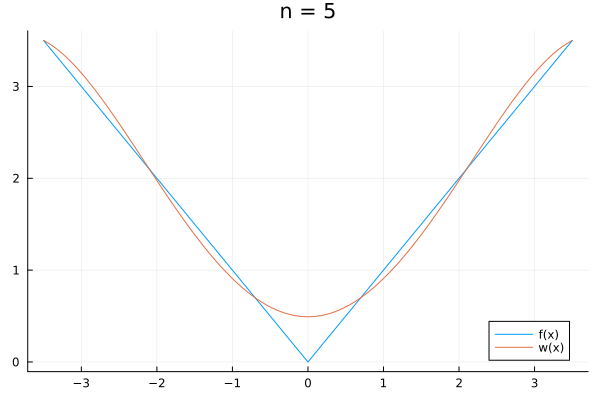

In [40]:
using Plots

# Assuming ilorazyRoznicowe and warNewton are defined elsewhere

function rysujNnfx(f, a::Float64, b::Float64, n::Int)
    h = (b - a) / n
    points_f = [a + i * h for i in 0:n]
    values_f = [f(x) for x in points_f]

    fx = ilorazyRoznicowe(points_f, values_f)

    points_num = 100 * n + 1
    delta = (b - a) / (points_num - 1)

    x_values = [a + i * delta for i in 0:points_num-1]
    y_values = [f(x) for x in x_values]
    w_values = [warNewton(points_f, fx, x) for x in x_values]

    plot()
    title!("n = $n")
    plot!(x_values, y_values, label="f(x)")
    plot!(x_values, w_values, label="w(x)")
end

f1(x) = abs(x)

rysujNnfx(f1, -3.5, 3.5, 5)


In [31]:
using Plots

# Assuming ilorazyRoznicowe and warNewton are defined elsewhere

function rysujNnfx(f, a::Float64, b::Float64, n::Int, filename::String)
    h = (b - a) / n
    points_f = [a + i * h for i in 0:n]
    values_f = [f(x) for x in points_f]

    fx = ilorazyRoznicowe(points_f, values_f)

    points_num = 100 * n + 1
    delta = (b - a) / (points_num - 1)

    x_values = [a + i * delta for i in 0:points_num-1]
    y_values = [f(x) for x in x_values]
    w_values = [warNewton(points_f, fx, x) for x in x_values]

    plot()
    title!("n = $n")
    plot!(x_values, y_values, label="f(x)")
    plot!(x_values, w_values, label="w(x)")
    savefig(filename)
end

f1(x) = abs(x)
f2(x) = 1/1(1+x^2)

filename1 = "plots/ex5_1"
filename2 = "plots/ex5_2"

rysujNnfx(f1, -1., 1., 5, filename1*"_n5.png")
rysujNnfx(f1, -1., 1., 10, filename1*"_n10.png")
rysujNnfx(f1, -1., 1., 15, filename1*"_n15.png")

rysujNnfx(f2, -5., 5., 5, filename2*"_n5.png")
rysujNnfx(f2, -5., 5., 10, filename2*"_n10.png")
rysujNnfx(f2, -5., 5., 15, filename2*"_n15.png")


"/home/jabuk/Studia/semester5/on/l4/plots/ex5_2_n15.png"